In [ ]:
import numpy as np
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from google.colab import files

# Завантажити дані та вивести на екран назви колонок і розмір.

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Paris.csv']), encoding="ISO-8859-1", sep=",")
df.head()

Saving Paris.csv to Paris.csv


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [ ]:
print('Column names: ', df.columns)
print('Shape: ', df.shape)

Column names:  Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')
Shape:  (10000, 18)


# Опрацювати пропуски (заповнити або видалити).

In [ ]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

# Візуалізувати дані: побудувати графік (heatmap); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної.

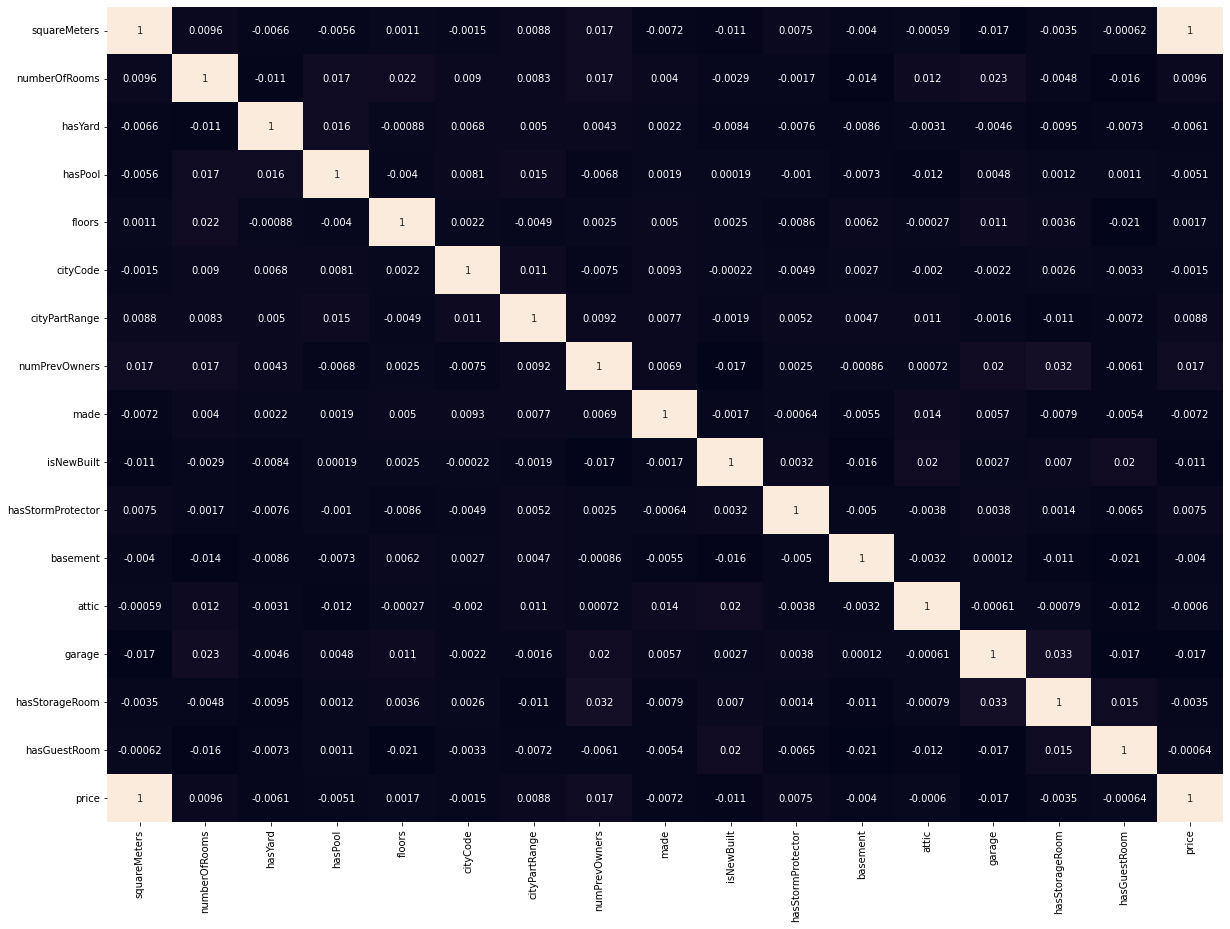

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, cbar=False)
plt.show()

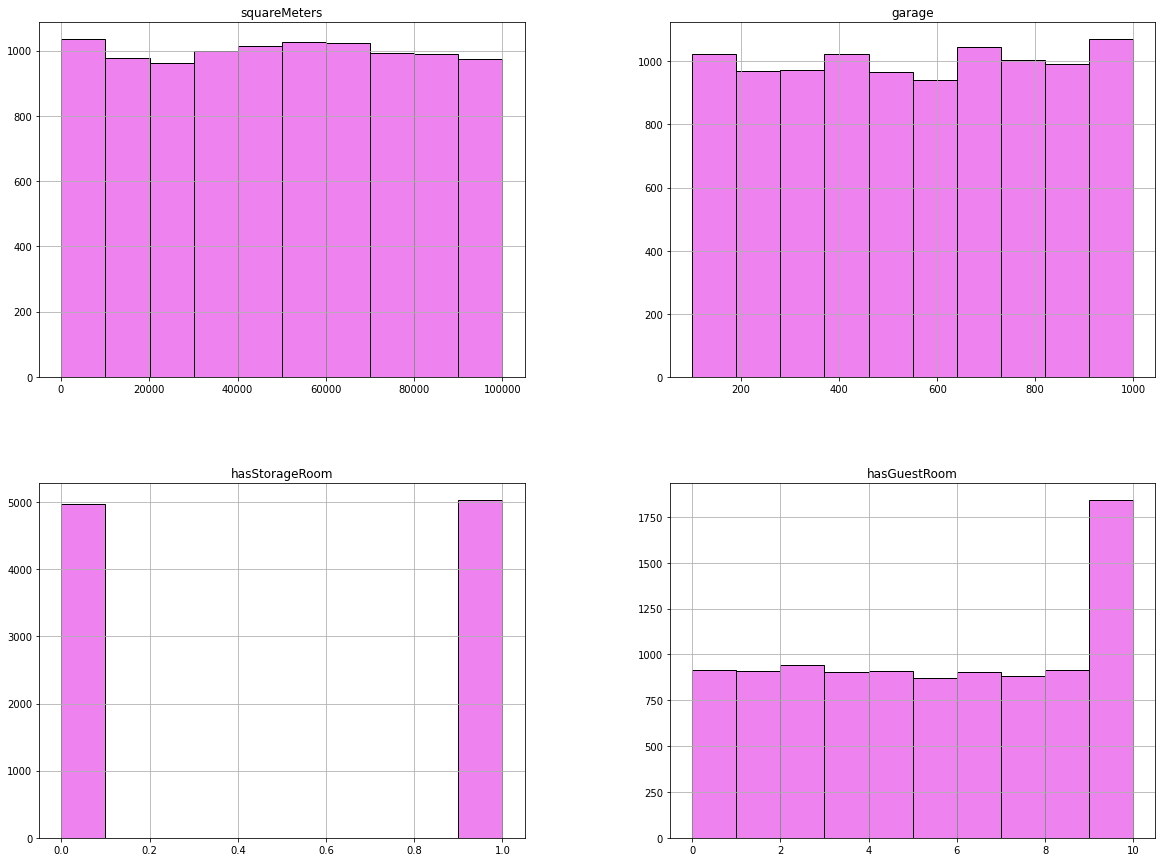

In [ ]:
columns = ['squareMeters','garage', 'hasStorageRoom', 'hasGuestRoom']
df.loc[:,columns].hist(color='violet', edgecolor='black', figsize=(20,15))
plt.show()

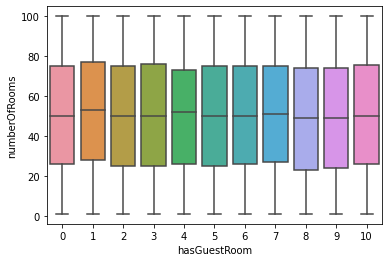

In [ ]:
sns.boxplot(x=df["hasGuestRoom"],y=df["numberOfRooms"])

# Нормалізувати дані.

In [ ]:
scaler = StandardScaler()
scaler.fit(df.drop(columns=["category"], axis=1))
scaled_features = pd.DataFrame(scaler.transform(df.drop(columns=["category"], axis=1)))

In [ ]:
trgt = ['category']      
dfprep = df.columns.drop(trgt)
train,test = train_test_split(df,test_size = 0.3, random_state=0)
xTrain = train[dfprep]
yTrain = train[trgt]
xTest  = test[dfprep]
yTest = test[trgt]

# Оптимальний параметр: KNN.

In [ ]:
param_grid ={'n_neighbors': [3,5,7,9,11]}
knnModel = KNeighborsClassifier()
grid_search=GridSearchCV(knnModel, param_grid,cv=5, return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("Best score:", grid_search.best_score_)
print("Best parameters:\n", grid_search.best_estimator_)

Best score: 0.8732857142857142
Best parameters:
 KNeighborsClassifier(n_neighbors=11)


# KNN.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xTrain, yTrain)
prediction = knn.predict(xTest)
print('K = 2')
print(confusion_matrix(yTest, prediction))

print(classification_report(yTest, prediction))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K = 2
[[2583   32]
 [ 383    2]]
              precision    recall  f1-score   support

       Basic       0.87      0.99      0.93      2615
      Luxury       0.06      0.01      0.01       385

    accuracy                           0.86      3000
   macro avg       0.46      0.50      0.47      3000
weighted avg       0.77      0.86      0.81      3000



# Дерево прийняття рішень (візуалізувати).

In [ ]:
model1 = DecisionTreeClassifier(criterion='gini')
model1.fit(xTrain, yTrain)
predictions1 = model1.predict(xTest)
print(classification_report(yTest, predictions1))
print(confusion_matrix(yTest,predictions1))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      2615
      Luxury       1.00      1.00      1.00       385

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

[[2615    0]
 [   0  385]]


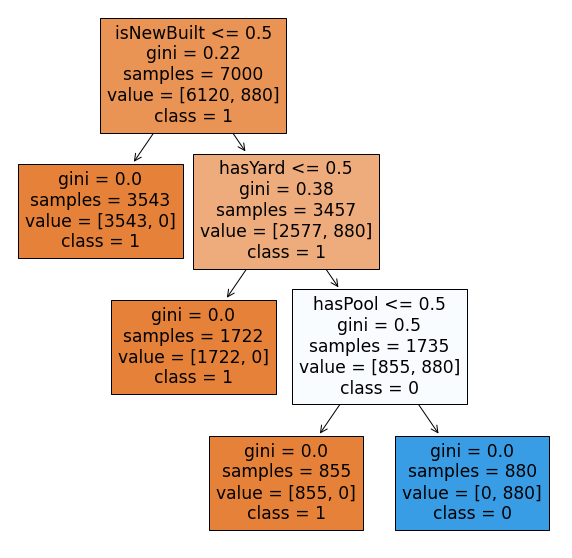

In [ ]:
plt.figure(figsize = (10, 10))
tree.plot_tree(model1, feature_names = xTrain.columns, class_names= ['1', '0'], filled = True)
plt.show()

# SVM.

In [ ]:
model2 = SVC(C=1, gamma = 0.01, kernel = 'rbf')
model2.fit(xTrain,yTrain.values.ravel())
predictions2 = model2.predict(xTest)
print(classification_report(yTest, predictions2))

              precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      2615
      Luxury       0.00      0.00      0.00       385

    accuracy                           0.87      3000
   macro avg       0.44      0.50      0.47      3000
weighted avg       0.76      0.87      0.81      3000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Для SVM підібрати оптимальні «C» і «gamma» (використовуючи GridSearch).

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(xTrain, yTrain.values.ravel())
print(grid.best_params_)
grid_predictions = grid.predict(xTest)
print(classification_report(yTest, grid_predictions))
print(confusion_matrix(yTest, grid_predictions))

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      2615
      Luxury       0.00      0.00      0.00       385

    accuracy                           0.87      3000
   macro avg       0.44      0.50      0.47      3000
weighted avg       0.76      0.87      0.81      3000

[[2615    0]
 [ 385    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 'Random Forest'.

In [ ]:
model4 = RandomForestClassifier(random_state=0)
model4.fit(xTrain,yTrain)
predictions4 = model4.predict(xTest)
print(classification_report(yTest, predictions4))

<ipython-input-25-f79b536604b4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(xTrain,yTrain)


              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      2615
      Luxury       1.00      1.00      1.00       385

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



# Підібрати оптимальні параметри для Random Forest (використовуючи  GridSearch).

In [ ]:
param_grid2 = {'criterion': ["entropy","gini"],'max_depth' : [2, 5, 10, 20, None],}
gridForest = GridSearchCV(RandomForestClassifier(), param_grid2, n_jobs=-1)
gridForest.fit(xTrain, yTrain)
print(gridForest.best_params_)
grid_predictions2 = gridForest.predict(xTest)
print(classification_report(yTest, grid_predictions2))
print(confusion_matrix(yTest, grid_predictions2))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'criterion': 'entropy', 'max_depth': 10}
              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      2615
      Luxury       1.00      1.00      1.00       385

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

[[2615    0]
 [   0  385]]


# AdaBoost.

In [ ]:
model3 = AdaBoostClassifier(n_estimators=100, random_state=0)
model3.fit(xTrain,yTrain)
predictions3 = model3.predict(xTest)
print(classification_report(yTest, predictions3))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      2615
      Luxury       1.00      1.00      1.00       385

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



# Підібрати оптимальні параметри для AdaBoost (викоритсовуючи GridSearch).

In [ ]:
param_grid1 = {'n_estimators': [100, 200, 300, 400], 'learning_rate' : [0.01,0.05,0.1,0.3,1],}
gridAdaBoost = GridSearchCV(AdaBoostClassifier(), param_grid1, n_jobs=-1)
gridAdaBoost.fit(xTrain, yTrain)
print(gridAdaBoost.best_params_)
grid_predictions1 = gridAdaBoost.predict(xTest)
print(classification_report(yTest, grid_predictions1))
print(confusion_matrix(yTest, grid_predictions1))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.01, 'n_estimators': 100}
              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      2615
      Luxury       1.00      1.00      1.00       385

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

[[2615    0]
 [   0  385]]
